In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load local version of gallifrey, before pip installed version, for debugging
import pathlib
import sys
import os

sys.path.append(str(pathlib.Path(os.getcwd()).parent.joinpath("src")))

In [3]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from gallifrey.setup import data_setup
from gallifrey.particles import rotated_dataset

from yt_maps import plot_component_maps

## DATA SETUP

In [4]:
snapshot = 127
resolution = 4096
sim_id = "09_18"
save = False

In [5]:
ds, mw, stellar_model, imf, planet_model = data_setup(
    snapshot=snapshot,
    resolution=resolution,
    sim_id=sim_id,
)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-09-11 14:16:46,498 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-09-11 14:16:46,570 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-09-11 14:16:46,571 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-09-11 14:16:46,572 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-09-11 14:16:46,572 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-09-11 14:16:46,573 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-09-11 14:16:46,573 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-09-11 14:16:46,573 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-09-11 14:16:46,573 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-09-11 14:16:46,574 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## CREATE DATA SOURCE

In [6]:
radius = 80  # can contain a cube of 80/sqrt(3) = 46 kpc, so plots with a smaller width will have no edge effects
normal_vector = mw.normal_vector("stars", data=mw.sphere(radius=(10, "kpc")))

In [7]:
sphere_data = mw.sphere(radius=ds.quan(radius, "kpc"))
rotated_data = {
    component: rotated_dataset(
        sphere_data,
        mw.centre(),
        normal_vector,
        [
            (f"{component}_stars", "total_number"),
        ],
        bounding_box=[[-radius, radius]] * 3,
    )
    for component in ["bulge", "thin_disk", "thick_disk", "halo"]
}

yt : [INFO     ] 2023-09-11 14:16:56,209 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-09-11 14:16:56,210 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-09-11 14:16:56,211 Parameters: domain_left_edge          = [-80. -80. -80.]
yt : [INFO     ] 2023-09-11 14:16:56,211 Parameters: domain_right_edge         = [80. 80. 80.]
yt : [INFO     ] 2023-09-11 14:16:56,212 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-09-11 14:16:56,213 Allocating for 4.018e+04 particles
yt : [INFO     ] 2023-09-11 14:17:00,501 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-09-11 14:17:00,502 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-09-11 14:17:00,503 Parameters: domain_left_edge          = [-80. -80. -80.]
yt : [INFO     ] 2023-09-11 14:17:00,503 Parameters: domain_right_edge         = [80. 80. 80.]
yt : [INFO     ] 2023-09-11 14:17:00,504 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-09

## PLOT MAPS

yt : [INFO     ] 2023-09-11 14:17:10,664 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-11 14:17:10,664 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-11 14:17:10,667 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-11 14:17:10,667 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-11 14:17:10,671 Splatting (('bulge_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-11 14:17:12,310 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-11 14:17:12,311 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-11 14:17:12,314 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-11 14:17:12,314 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-11 14:17:12,316 Splatting (('thin_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-11 14:17:13,903 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-11 14:17:13,904 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-11 14:17:13,908 xlim = -21.

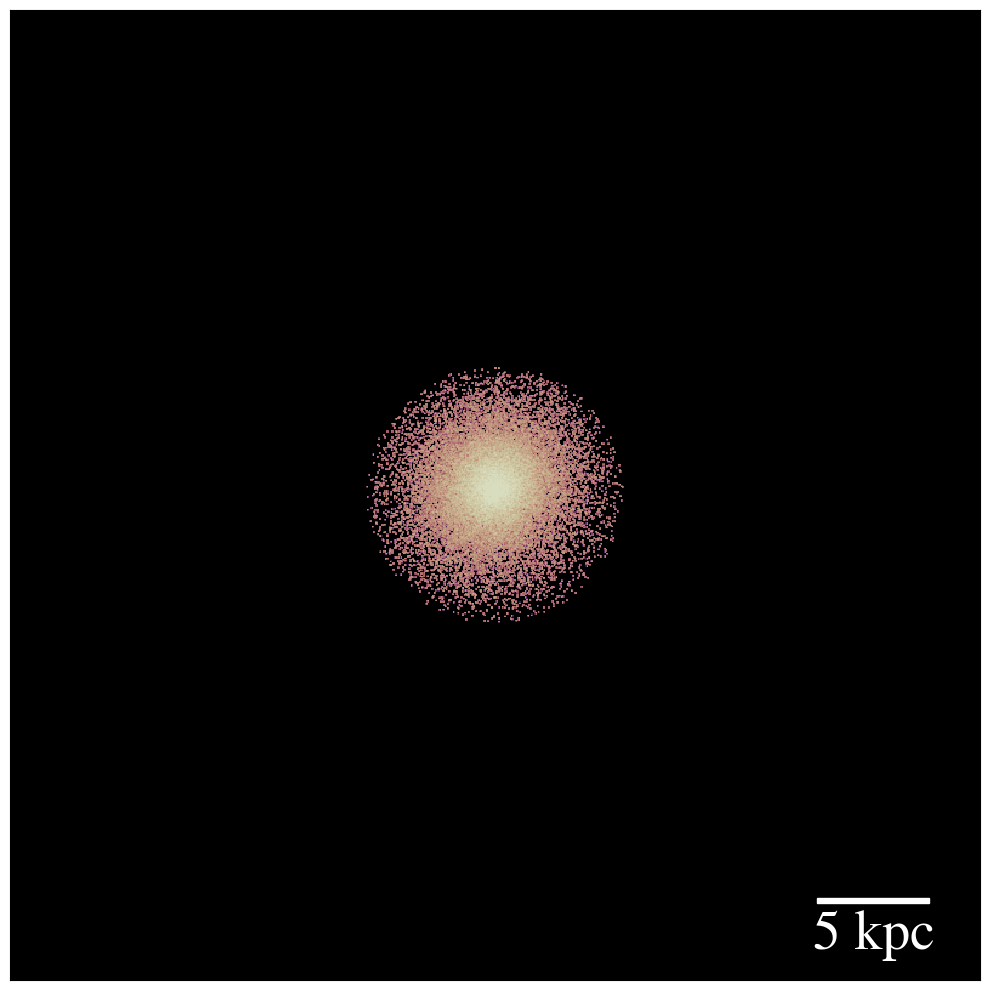

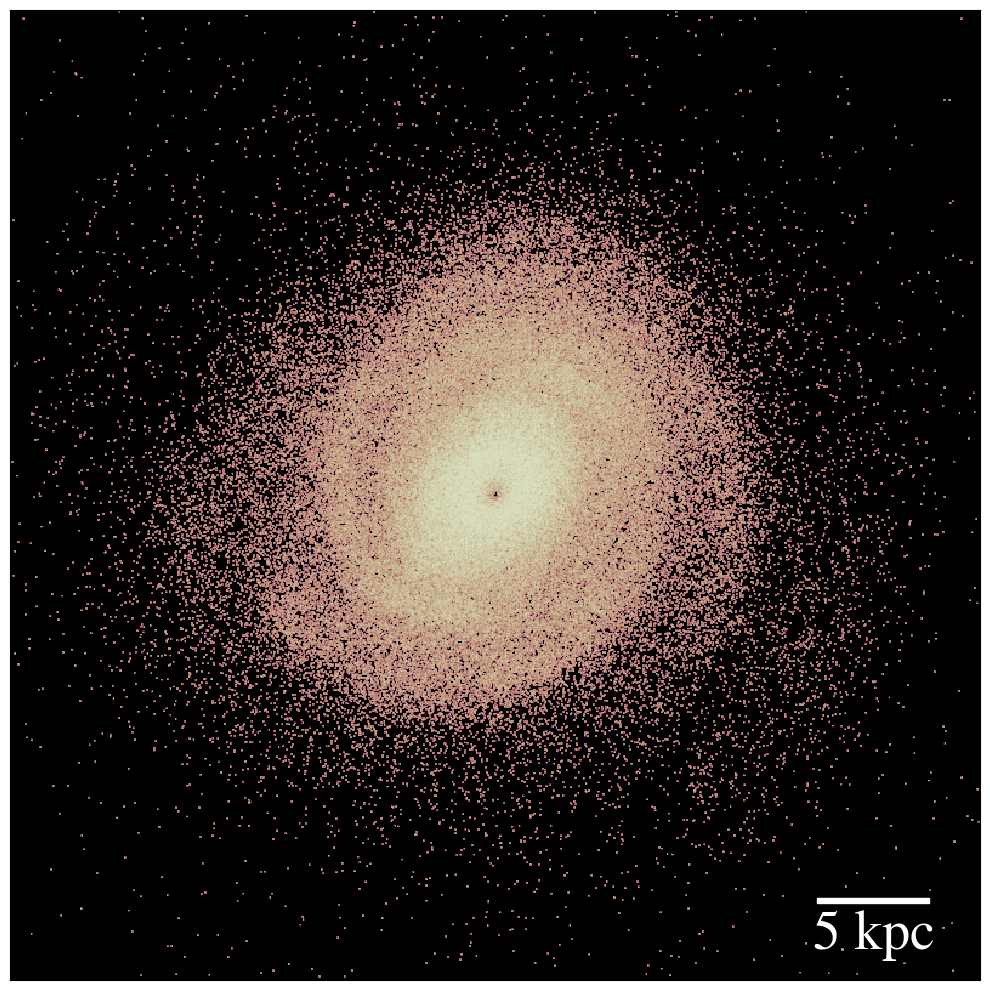

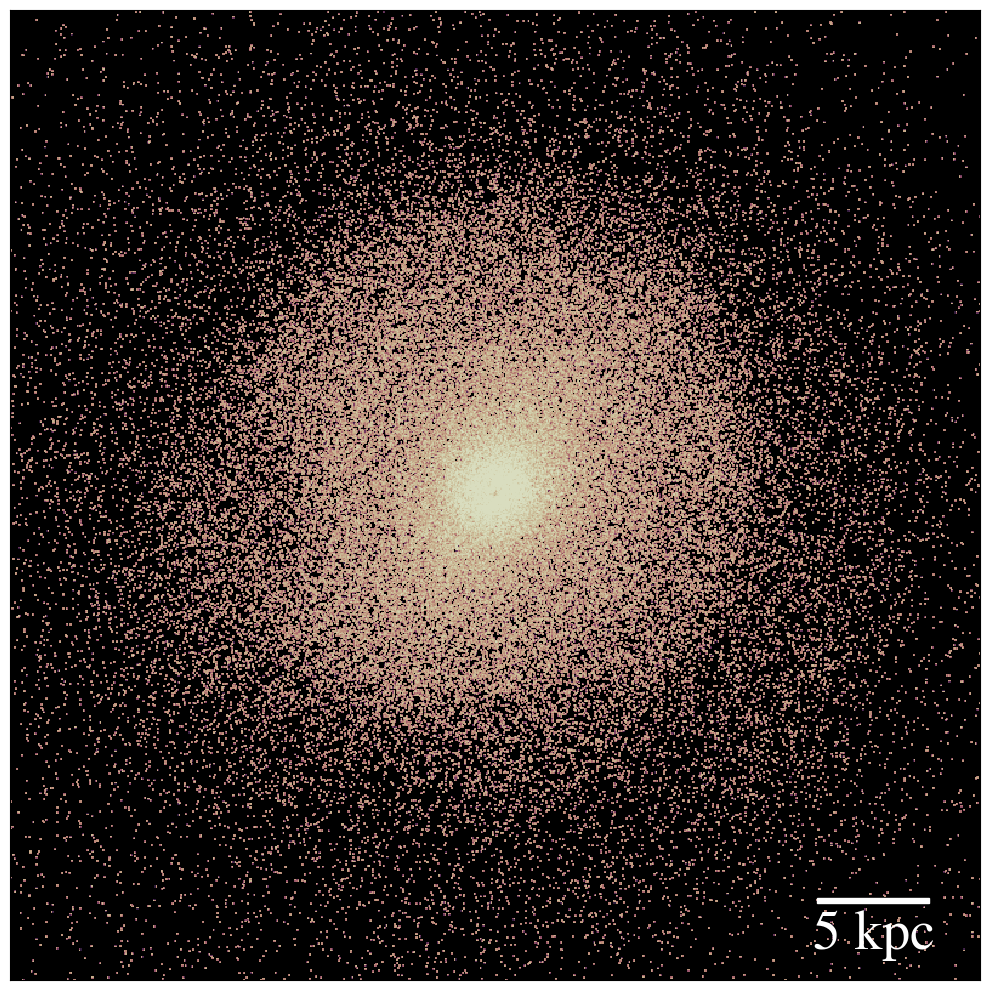

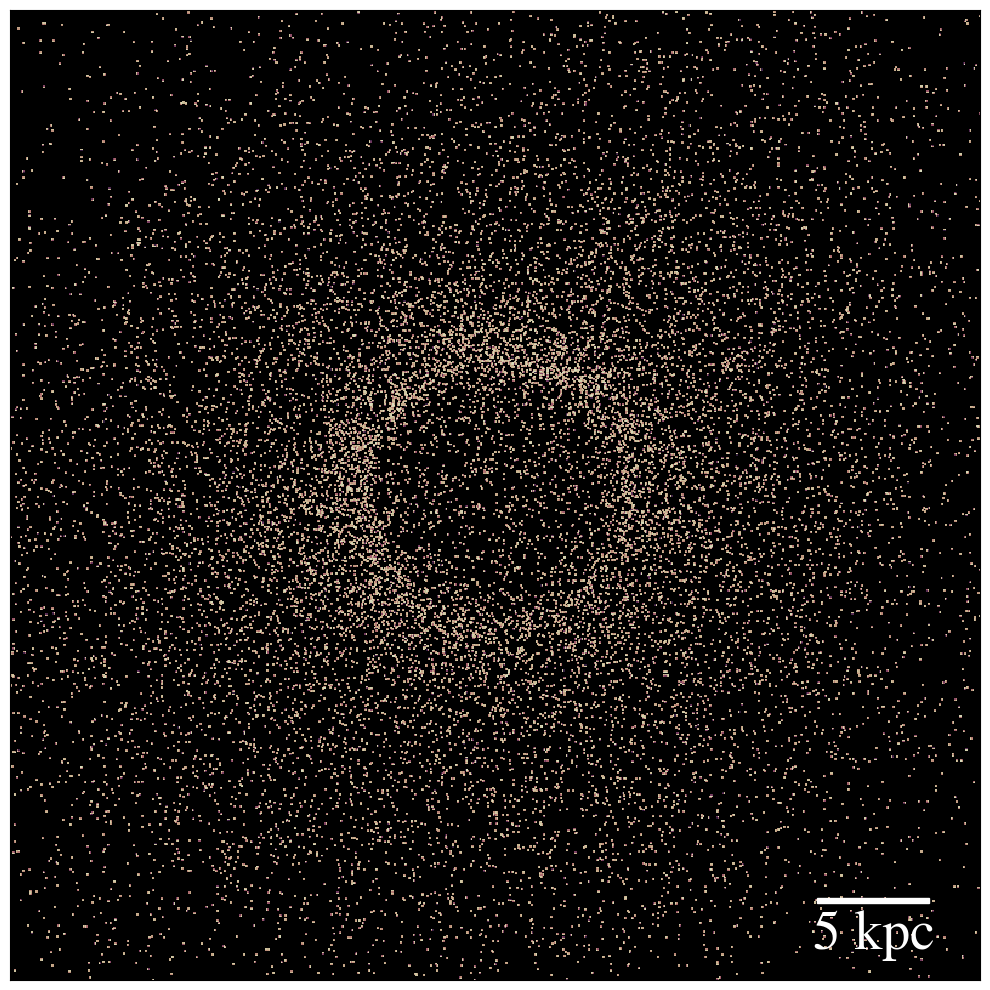

In [8]:
plots, figs = plot_component_maps(
    galaxy_component_data=rotated_data,
    normal="z",
    save=save,
    hide_colorbar=True,
    hide_axes=True,
)